In [2]:
# import libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
from pyparsing import conditionAsParseAction
import statsmodels.api as sm
import seaborn as sns

In [3]:
# load the data and convert to a dataframe
data = 'winequality-red.csv'
df = pd.read_csv(data, sep=";")

In [3]:
# print the first 5 rows of the dataframe
print("----------------------------------------------------------")
print(df.head(5))
print("----------------------------------------------------------")

----------------------------------------------------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0    

In [4]:
# basic information about the dataframe
print('Cantidad de filas (observaciones) y columnas (variables):',df.shape)
print("----------------------------------------------------------")

Cantidad de filas (observaciones) y columnas (variables): (1599, 12)
----------------------------------------------------------


In [5]:
info = df.info()
print(info)
print("----------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
----------------------------------------------------------


In [6]:
print('Tipo de datos: \n',df.dtypes)
print("----------------------------------------------------------")

Tipo de datos: 
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
----------------------------------------------------------


In [7]:
describe = df.describe()
print(describe)
print("----------------------------------------------------------")

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [8]:
# basic information about the dataframe, without using the describe function
for i in df.columns:
    print("\n\nVariable: ", df[i].name)
    print("Quantiles: ", df[i].quantile(q=[0.1, 0.25, 0.5]))
    print("Desviación estandar: ", df[i].std())
    print("Promedio: ", df[i].mean())
    print("Minimo: ", df[i].min())
    print("Maximo: ",df[i].max())
    print("----------------------------------------------------------")



Variable:  fixed acidity
Quantiles:  0.10    6.5
0.25    7.1
0.50    7.9
Name: fixed acidity, dtype: float64
Desviación estandar:  1.7410963181276953
Promedio:  8.31963727329581
Minimo:  4.6
Maximo:  15.9
----------------------------------------------------------


Variable:  volatile acidity
Quantiles:  0.10    0.31
0.25    0.39
0.50    0.52
Name: volatile acidity, dtype: float64
Desviación estandar:  0.17905970415353537
Promedio:  0.5278205128205128
Minimo:  0.12
Maximo:  1.58
----------------------------------------------------------


Variable:  citric acid
Quantiles:  0.10    0.01
0.25    0.09
0.50    0.26
Name: citric acid, dtype: float64
Desviación estandar:  0.19480113740531857
Promedio:  0.2709756097560976
Minimo:  0.0
Maximo:  1.0
----------------------------------------------------------


Variable:  residual sugar
Quantiles:  0.10    1.7
0.25    1.9
0.50    2.2
Name: residual sugar, dtype: float64
Desviación estandar:  1.4099280595072798
Promedio:  2.53880550343965
Minimo

In [9]:
# take off the column names
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.rename(columns=df.iloc[0]).drop(df.index[0])
print(df)
print("----------------------------------------------------------")

0     7.4000   0.7000   0.0000   1.9000   0.0760   11.0000  34.0000  0.9978   \
1         7.8    0.880     0.00      2.6    0.098     25.0     67.0  0.99680   
2         7.8    0.760     0.04      2.3    0.092     15.0     54.0  0.99700   
3        11.2    0.280     0.56      1.9    0.075     17.0     60.0  0.99800   
4         7.4    0.700     0.00      1.9    0.076     11.0     34.0  0.99780   
5         7.4    0.660     0.00      1.8    0.075     13.0     40.0  0.99780   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1594      6.2    0.600     0.08      2.0    0.090     32.0     44.0  0.99490   
1595      5.9    0.550     0.10      2.2    0.062     39.0     51.0  0.99512   
1596      6.3    0.510     0.13      2.3    0.076     29.0     40.0  0.99574   
1597      5.9    0.645     0.12      2.0    0.075     32.0     44.0  0.99547   
1598      6.0    0.310     0.47      3.6    0.067     18.0     42.0  0.99549   

0     3.5100   0.5600   9.4000   5.0000

In [10]:
# add the column names back
df.columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
print(df)
print("----------------------------------------------------------")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

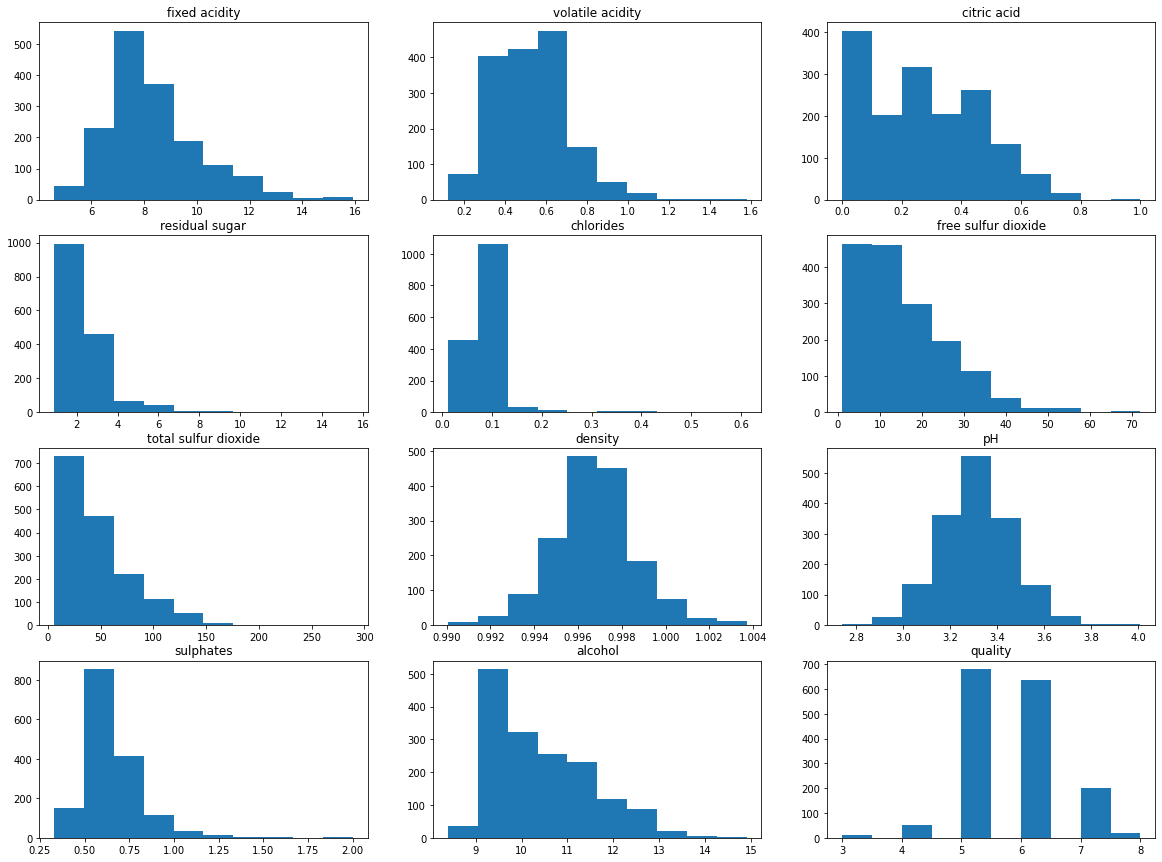

In [14]:
# histograms
index = 1
plt.figure(figsize=(20,15))
for i in df.columns:
    plt.subplot(4,3,index)
    plt.hist(df[i])
    plt.title(i)
    index += 1
plt.show()

## Regresión lineal múltiple

In [8]:
#Data with all features
X = df.drop('quality', axis=1)
y = df['quality']
print(df.head())
print(X)
print(y)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
lr_multiple = LinearRegression()

# Training model
lr_multiple.fit(X_train, y_train)

# Testing model
y_pred = lr_multiple.predict(X_test)
print('Coefficients: \n', lr_multiple.coef_)
print('Intercept: ', lr_multiple.intercept_)

print("Model:\ny = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x3".format(lr_multiple.intercept_, lr_multiple.coef_[0], lr_multiple.coef_[1], lr_multiple.coef_[2], lr_multiple.coef_[3]))

print("\n--Metricas--")
print(" Mean squared error: {:.6f}\n r2_score: {:.4f}\n Mean Absolute Error: {:.4f}\n explained_variance_score: {:.6f} \n Precision:{:.6f}".format(mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred),mean_absolute_error(y_test, y_pred),explained_variance_score(y_test, y_pred), lr_multiple.score(X_test, y_test)))

Coefficients: 
 [ 3.21701286e-02 -1.03467859e+00 -1.53320498e-01  1.23460437e-02
 -1.61715049e+00  5.08258596e-03 -3.32744691e-03 -1.57794200e+01
 -3.84377830e-01  8.10208705e-01  2.88021969e-01]
Intercept:  19.611580823864184
Model:
y = 19.6116 + 0.0322x1 + -1.0347x2 + -0.1533x3

--Metricas--
 Mean squared error: 0.366301
 r2_score: 0.3869
 Mean Absolute Error: 0.4678
 explained_variance_score: 0.388398 
 Precision:0.386904
